In [1]:
import os, glob
import collections
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('../advent-of-code22.cabal') as f:
    build_depends = [l for l in f.readlines() if 'build-depends' in l]
build_depends

['  build-depends:       base >=4.16\n',
 '    build-depends:    base ^>=4.16.4.0\n',
 '  build-depends:  base >=4.16\n',
 '  build-depends: split\n',
 '  build-depends: text, attoparsec\n',
 '  build-depends: containers, split\n',
 '  build-depends: text, attoparsec\n',
 '  build-depends: text, attoparsec, intervals\n',
 '  build-depends: text, attoparsec, containers\n',
 '  build-depends: text, attoparsec, containers, rosezipper\n',
 '  build-depends: text, attoparsec, containers, linear, lens\n',
 '  build-depends: text, attoparsec, split\n',
 '  build-depends: text, attoparsec, containers, lens, mtl\n',
 '  build-depends: containers, linear, array, pqueue, mtl, lens\n',
 '  build-depends: text, attoparsec\n',
 '  build-depends: text, attoparsec, containers, linear, lens\n',
 '  build-depends: text, attoparsec, containers, linear, lens\n',
 '  build-depends: text, attoparsec, containers, pqueue, mtl, lens, split\n',
 '  build-depends: containers, linear, lens\n',
 '  build-depends: 

In [3]:
cabal_file = open('../advent-of-code22.cabal').read()
executables = cabal_file.split('executable')[2:]
executables[:3]

[', other than Main.\n    -- other-modules:\n\n    -- LANGUAGE extensions used by modules in this package.\n    -- other-extensions:\n    build-depends:    base ^>=4.16.4.0\n    hs-source-dirs:   app, src\n    default-language: Haskell2010\n\nlibrary\n  import: common-extensions\n  build-depends:  base >=4.16\n  hs-source-dirs: ., app, src\n  exposed-modules: AoC\n\n',
 ' advent01\n  import: common-extensions, build-directives\n  main-is: advent01/Main.hs\n  build-depends: split\n\n',
 ' advent02\n  import: common-extensions, build-directives\n  main-is: advent02/Main.hs\n  build-depends: text, attoparsec\n\n']

In [4]:
e = executables[1]
e.strip().split('build-depends: ')[1].split(',')

['split']

In [5]:
def extract(line):
    parts = line.strip().split('build-depends: ')
    name = parts[0].split()[0]
    if len(parts) > 1:
        depends = [p.strip() for p in parts[1].split('\n')[0].split(',') if 'base' not in p]
    else:
        depends = []
    return name, depends       

In [6]:
modules = {e: ms for e, ms in [extract(e) for e in executables] if e.endswith(tuple(str(i) for i in range(10)))}
modules

{'advent01': ['split'],
 'advent02': ['text', 'attoparsec'],
 'advent03': ['containers', 'split'],
 'advent04': ['text', 'attoparsec'],
 'advent05': ['text', 'attoparsec', 'containers'],
 'advent06': [],
 'advent07': ['text', 'attoparsec', 'containers', 'rosezipper'],
 'advent08': [],
 'advent09': ['text', 'attoparsec', 'containers', 'linear', 'lens'],
 'advent10': ['text', 'attoparsec', 'split'],
 'advent11': ['text', 'attoparsec', 'containers', 'lens', 'mtl'],
 'advent12': ['containers', 'linear', 'array', 'pqueue', 'mtl', 'lens'],
 'advent13': ['text', 'attoparsec'],
 'advent14': ['text', 'attoparsec', 'containers', 'linear', 'lens'],
 'advent15': ['text', 'attoparsec', 'containers', 'linear', 'lens'],
 'advent16': ['text',
  'attoparsec',
  'containers',
  'pqueue',
  'mtl',
  'lens',
  'split'],
 'advent17': ['containers', 'linear', 'lens'],
 'advent18': ['text', 'attoparsec', 'containers', 'linear', 'lens'],
 'advent19': ['text',
  'attoparsec',
  'containers',
  'pqueue',
  'mtl

In [7]:
all_modules = set(m for p in modules for m in modules[p])
modules_df = pd.DataFrame.from_dict({p: {m: m in modules[p] for m in sorted(all_modules)} for p in modules}, orient='index').sort_index()
modules_df

array  attoparsec  containers  data-clist  deepseq   lens  linear  \
advent01  False       False       False       False    False  False   False   
advent02  False        True       False       False    False  False   False   
advent03  False       False        True       False    False  False   False   
advent04  False        True       False       False    False  False   False   
advent05  False        True        True       False    False  False   False   
advent06  False       False       False       False    False  False   False   
advent07  False        True        True       False    False  False   False   
advent08  False       False       False       False    False  False   False   
advent09  False        True        True       False    False   True    True   
advent10  False        True       False       False    False  False   False   
advent11  False        True        True       False    False   True   False   
advent12   True       False        True       False    False   True    True   
advent13  False        True       False       False    False  False   False   
advent14  False        True        True       False    False   True    True   
advent15  False        True        True       False    False   True    True   
advent16  False        True        True       False    False   True   False   
advent17  False       False        True       False    False   True    True   
advent18  False        True        True       False    False   True    True   
advent19  False        True        True       False     True   True   False   
advent20  False       False       False        True    False   True   False   
advent21  False        True        True       False    False   True   False   
advent22  False       False        True       False    False   True    True   
advent23  False       False        True       False    False   True    True   
advent24   True       False        True       False    False   True    True   
advent25  False       False       False       False    False  False   False   

            mtl  multiset  parallel  pqueue  rosezipper  split   text  
advent01  False     False     False   False       False   True  False  
advent02  False     False     False   False       False  False   True  
advent03  False     False     False   False       False   True  False  
advent04  False     False     False   False       False  False   True  
advent05  False     False     False   False       False  False   True  
advent06  False     False     False   False       False  False  False  
advent07  False     False     False   False        True  False   True  
advent08  False     False     False   False       False  False  False  
advent09  False     False     False   False       False  False   True  
advent10  False     False     False   False       False   True   True  
advent11   True     False     False   False       False  False   True  
advent12   True     False     False    True       False  False  False  
advent13  False     False     False   False       False  False   True  
advent14  False     False     False   False       False  False   True  
advent15  False     False     False   False       False  False   True  
advent16   True     False     False    True       False   True   True  
advent17  False     False     False   False       False  False  False  
advent18  False     False     False   False       False  False   True  
advent19   True      True      True    True       False  False   True  
advent20  False     False     False   False       False  False  False  
advent21  False     False     False   False       False  False   True  
advent22   True     False     False   False       False  False  False  
advent23   True      True     False   False       False  False  False  
advent24   True     False     False    True       False  False  False  
advent25  False     False     False   False       False  False  False

In [8]:
print(modules_df.sum().sort_values(ascending=False).to_markdown())

|            |   0 |
|:-----------|----:|
| containers |  16 |
| attoparsec |  14 |
| lens       |  14 |
| text       |  14 |
| linear     |   9 |
| mtl        |   7 |
| pqueue     |   4 |
| split      |   4 |
| array      |   2 |
| multiset   |   2 |
| data-clist |   1 |
| deepseq    |   1 |
| parallel   |   1 |
| rosezipper |   1 |


In [22]:
sorted_modules = modules_df.sum().sort_values(ascending=False).index.values
sorted_modules

array(['containers', 'attoparsec', 'lens', 'text', 'linear', 'mtl',
       'pqueue', 'split', 'array', 'multiset', 'data-clist', 'deepseq',
       'parallel', 'rosezipper'], dtype=object)

In [23]:
modules_sorted_cols = modules_df[sorted_modules]
modules_sorted_cols

containers  attoparsec   lens   text  linear    mtl  pqueue  split  \
advent01       False       False  False  False   False  False   False   True   
advent02       False        True  False   True   False  False   False  False   
advent03        True       False  False  False   False  False   False   True   
advent04       False        True  False   True   False  False   False  False   
advent05        True        True  False   True   False  False   False  False   
advent06       False       False  False  False   False  False   False  False   
advent07        True        True  False   True   False  False   False  False   
advent08       False       False  False  False   False  False   False  False   
advent09        True        True   True   True    True  False   False  False   
advent10       False        True  False   True   False  False   False   True   
advent11        True        True   True   True   False   True   False  False   
advent12        True       False   True  False    True   True    True  False   
advent13       False        True  False   True   False  False   False  False   
advent14        True        True   True   True    True  False   False  False   
advent15        True        True   True   True    True  False   False  False   
advent16        True        True   True   True   False   True    True   True   
advent17        True       False   True  False    True  False   False  False   
advent18        True        True   True   True    True  False   False  False   
advent19        True        True   True   True   False   True    True  False   
advent20       False       False   True  False   False  False   False  False   
advent21        True        True   True   True   False  False   False  False   
advent22        True       False   True  False    True   True   False  False   
advent23        True       False   True  False    True   True   False  False   
advent24        True       False   True  False    True   True    True  False   
advent25       False       False  False  False   False  False   False  False   

          array  multiset  data-clist  deepseq  parallel  rosezipper  
advent01  False     False       False    False     False       False  
advent02  False     False       False    False     False       False  
advent03  False     False       False    False     False       False  
advent04  False     False       False    False     False       False  
advent05  False     False       False    False     False       False  
advent06  False     False       False    False     False       False  
advent07  False     False       False    False     False        True  
advent08  False     False       False    False     False       False  
advent09  False     False       False    False     False       False  
advent10  False     False       False    False     False       False  
advent11  False     False       False    False     False       False  
advent12   True     False       False    False     False       False  
advent13  False     False       False    False     False       False  
advent14  False     False       False    False     False       False  
advent15  False     False       False    False     False       False  
advent16  False     False       False    False     False       False  
advent17  False     False       False    False     False       False  
advent18  False     False       False    False     False       False  
advent19  False      True       False     True      True       False  
advent20  False     False        True    False     False       False  
advent21  False     False       False    False     False       False  
advent22  False     False       False    False     False       False  
advent23  False      True       False    False     False       False  
advent24   True     False       False    False     False       False  
advent25  False     False       False    False     False       False

In [18]:
modules_scatter = modules_df.stack().reset_index()
modules_scatter.columns = ['program', 'module', 'present']
modules_scatter = modules_scatter[modules_scatter.present]
modules_scatter

program      module  present
12   advent01       split     True
15   advent02  attoparsec     True
27   advent02        text     True
30   advent03  containers     True
40   advent03       split     True
..        ...         ...      ...
324  advent24  containers     True
327  advent24        lens     True
328  advent24      linear     True
329  advent24         mtl     True
332  advent24      pqueue     True

[90 rows x 3 columns]

<AxesSubplot:xlabel='program', ylabel='module'>

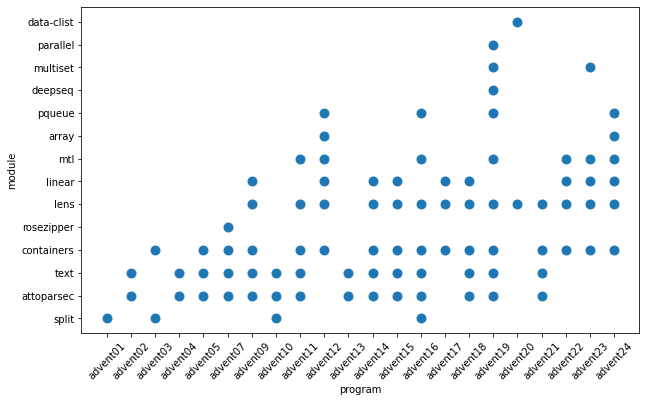

In [69]:
modules_scatter.plot.scatter(x='program', y='module', s=80, rot=45, figsize=(10, 6))

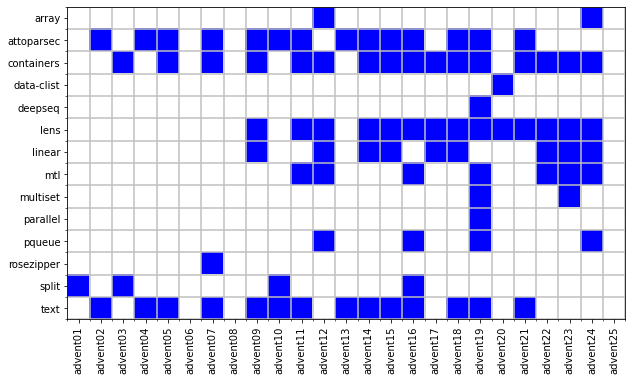

In [70]:
cmap = mpl.colors.ListedColormap(['white', 'blue'])

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(modules_df.to_numpy().T, cmap=cmap)
plt.xticks(range(modules_df.index.size), labels=modules_df.index.values, rotation=90);
plt.yticks(range(modules_df.columns.size), labels=modules_df.columns.values);

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax.grid(which='minor', axis='both', linestyle='-', color='silver', linewidth=1.5);
plt.savefig('packages.png');

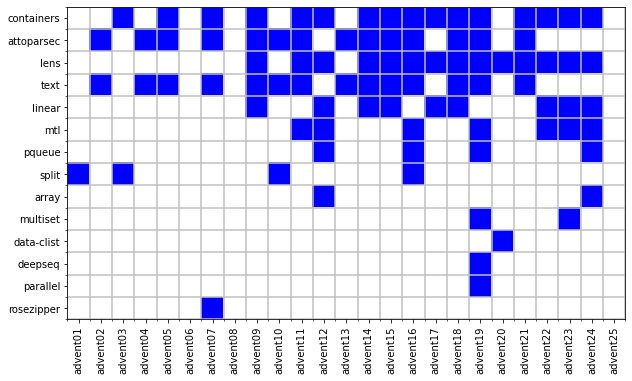

In [25]:
cmap = mpl.colors.ListedColormap(['white', 'blue'])

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(modules_sorted_cols.to_numpy().T, cmap=cmap)
plt.xticks(range(modules_sorted_cols.index.size), labels=modules_sorted_cols.index.values, rotation=90);
plt.yticks(range(modules_sorted_cols.columns.size), labels=modules_sorted_cols.columns.values);

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax.grid(which='minor', axis='both', linestyle='-', color='silver', linewidth=1.5);
plt.savefig('packages_sorted.png');

In [26]:
mains = list(sorted(f for f in glob.glob('../advent*/Main.hs')))
mains

['../advent01/Main.hs',
 '../advent02/Main.hs',
 '../advent03/Main.hs',
 '../advent04/Main.hs',
 '../advent05/Main.hs',
 '../advent06/Main.hs',
 '../advent07/Main.hs',
 '../advent08/Main.hs',
 '../advent09/Main.hs',
 '../advent10/Main.hs',
 '../advent11/Main.hs',
 '../advent12/Main.hs',
 '../advent13/Main.hs',
 '../advent14/Main.hs',
 '../advent15/Main.hs',
 '../advent16/Main.hs',
 '../advent17/Main.hs',
 '../advent18/Main.hs',
 '../advent19/Main.hs',
 '../advent20/Main.hs',
 '../advent21/Main.hs',
 '../advent22/Main.hs',
 '../advent23/Main.hs',
 '../advent24/Main.hs',
 '../advent25/Main.hs']

In [40]:
main_imports = {}

for m in mains:
    with open(m) as f:
        lines = f.readlines()
        import_lines = [l for l in lines if l.strip().startswith('import') if 'Debug.Trace' not in l]
        imports = []
        for i in import_lines:
            words = i.strip().split()
            if 'qualified' in i:
                imports.append((words[2], True))
            else:
                imports.append((words[1], False))
    main_imports[m.split('/')[1]] = imports

main_imports

{'advent01': [('AoC', False),
  ('Data.List', False),
  ('Data.List.Split', False),
  ('Data.Ord', False)],
 'advent02': [('AoC', False),
  ('Data.Text', False),
  ('Data.Text.IO', True),
  ('Data.Attoparsec.Text', False),
  ('Control.Applicative', False)],
 'advent03': [('AoC', False),
  ('Data.Char', False),
  ('Data.Set', True),
  ('Data.List', False),
  ('Data.List.Split', False)],
 'advent04': [('AoC', False),
  ('Data.Text', False),
  ('Data.Text.IO', True),
  ('Data.Attoparsec.Text', False)],
 'advent05': [('AoC', False),
  ('Data.Text', False),
  ('Data.Text.IO', True),
  ('Data.Attoparsec.Text', False),
  ('Control.Applicative', False),
  ('Data.List', False),
  ('Data.Maybe', False),
  ('Data.IntMap.Strict', True),
  ('Data.IntMap.Strict', False)],
 'advent06': [('AoC', False), ('Data.List', False)],
 'advent07': [('AoC', False),
  ('Data.Text', False),
  ('Data.Text.IO', True),
  ('Data.Attoparsec.Text', False),
  ('Control.Applicative', False),
  ('Data.Char', False),
  ('D

In [41]:
import_counts = collections.Counter(l for ls in main_imports.values() for l in ls)
import_counts.most_common()

[(('AoC', False), 25),
 (('Data.List', False), 16),
 (('Data.Text', False), 14),
 (('Data.Text.IO', True), 14),
 (('Data.Attoparsec.Text', False), 14),
 (('Control.Lens', False), 13),
 (('Data.Set', True), 11),
 (('Control.Applicative', False), 10),
 (('Data.Maybe', False), 10),
 (('Linear', False), 9),
 (('Control.Monad.Reader', False), 6),
 (('Data.Map.Strict', True), 5),
 (('Data.Ix', False), 5),
 (('Data.List.Split', False), 4),
 (('Data.Char', False), 4),
 (('Data.Sequence', True), 4),
 (('Data.Sequence', False), 4),
 (('Data.Map.Strict', False), 4),
 (('Data.IntMap.Strict', True), 3),
 (('Data.Ord', False), 2),
 (('Control.Monad.State.Strict', False), 2),
 (('Data.PQueue.Prio.Min', True), 2),
 (('Data.Array.IArray', False), 2),
 (('Data.PQueue.Prio.Max', True), 2),
 (('Data.MultiSet', False), 2),
 (('Data.IntMap.Strict', False), 1),
 (('Data.Tree', False), 1),
 (('Data.Tree.Zipper', False), 1),
 (('Data.IntMap', False), 1),
 (('Control.Monad.Writer', False), 1),
 (('Control.Monad

In [42]:
main_imports_unqualified = {m: set(i[0] for i in main_imports[m]) for m in main_imports}
main_imports_unqualified

{'advent01': {'AoC', 'Data.List', 'Data.List.Split', 'Data.Ord'},
 'advent02': {'AoC',
  'Control.Applicative',
  'Data.Attoparsec.Text',
  'Data.Text',
  'Data.Text.IO'},
 'advent03': {'AoC', 'Data.Char', 'Data.List', 'Data.List.Split', 'Data.Set'},
 'advent04': {'AoC', 'Data.Attoparsec.Text', 'Data.Text', 'Data.Text.IO'},
 'advent05': {'AoC',
  'Control.Applicative',
  'Data.Attoparsec.Text',
  'Data.IntMap.Strict',
  'Data.List',
  'Data.Maybe',
  'Data.Text',
  'Data.Text.IO'},
 'advent06': {'AoC', 'Data.List'},
 'advent07': {'AoC',
  'Control.Applicative',
  'Data.Attoparsec.Text',
  'Data.Char',
  'Data.List',
  'Data.Map.Strict',
  'Data.Maybe',
  'Data.Text',
  'Data.Text.IO',
  'Data.Tree',
  'Data.Tree.Zipper'},
 'advent08': {'AoC', 'Data.List'},
 'advent09': {'AoC',
  'Control.Applicative',
  'Control.Lens',
  'Data.Attoparsec.Text',
  'Data.List',
  'Data.Set',
  'Data.Text',
  'Data.Text.IO',
  'Linear'},
 'advent10': {'AoC',
  'Control.Applicative',
  'Data.Attoparsec.Tex

In [43]:
import_counts_unqualified = collections.Counter(l for ls in main_imports_unqualified.values() for l in ls)
import_counts_unqualified.most_common()

[('AoC', 25),
 ('Data.List', 16),
 ('Data.Text', 14),
 ('Data.Attoparsec.Text', 14),
 ('Data.Text.IO', 14),
 ('Control.Lens', 13),
 ('Data.Set', 11),
 ('Control.Applicative', 10),
 ('Data.Maybe', 10),
 ('Linear', 9),
 ('Control.Monad.Reader', 6),
 ('Data.Map.Strict', 5),
 ('Data.Ix', 5),
 ('Data.List.Split', 4),
 ('Data.Char', 4),
 ('Data.Sequence', 4),
 ('Data.IntMap.Strict', 3),
 ('Data.Ord', 2),
 ('Control.Monad.State.Strict', 2),
 ('Data.PQueue.Prio.Min', 2),
 ('Data.Array.IArray', 2),
 ('Data.PQueue.Prio.Max', 2),
 ('Data.MultiSet', 2),
 ('Data.Tree', 1),
 ('Data.Tree.Zipper', 1),
 ('Control.Monad.Writer', 1),
 ('Control.Monad.RWS.Strict', 1),
 ('Data.IntMap', 1),
 ('Data.Foldable', 1),
 ('Control.DeepSeq', 1),
 ('GHC.Generics', 1),
 ('Control.Parallel.Strategies', 1),
 ('Data.CircularList', 1),
 ('Prelude', 1),
 ('Data.Monoid', 1)]

In [44]:
all_imports = set(m for p in main_imports_unqualified for m in main_imports_unqualified[p])
imports_df = pd.DataFrame.from_dict(
    {p: {m: m in main_imports_unqualified[p] 
         for m in sorted(all_imports)} 
     for p in main_imports_unqualified}, 
    orient='index').sort_index()
imports_df

AoC  Control.Applicative  Control.DeepSeq  Control.Lens  \
advent01  True                False            False         False   
advent02  True                 True            False         False   
advent03  True                False            False         False   
advent04  True                False            False         False   
advent05  True                 True            False         False   
advent06  True                False            False         False   
advent07  True                 True            False         False   
advent08  True                False            False         False   
advent09  True                 True            False          True   
advent10  True                 True            False         False   
advent11  True                 True            False          True   
advent12  True                False            False          True   
advent13  True                 True            False         False   
advent14  True                False            False          True   
advent15  True                False            False         False   
advent16  True                 True            False          True   
advent17  True                False            False          True   
advent18  True                False            False          True   
advent19  True                 True             True          True   
advent20  True                False            False          True   
advent21  True                 True            False          True   
advent22  True                False            False          True   
advent23  True                False            False          True   
advent24  True                False            False          True   
advent25  True                False            False         False   

          Control.Monad.RWS.Strict  Control.Monad.Reader  \
advent01                     False                 False   
advent02                     False                 False   
advent03                     False                 False   
advent04                     False                 False   
advent05                     False                 False   
advent06                     False                 False   
advent07                     False                 False   
advent08                     False                 False   
advent09                     False                 False   
advent10                     False                 False   
advent11                      True                  True   
advent12                     False                  True   
advent13                     False                 False   
advent14                     False                 False   
advent15                     False                 False   
advent16                     False                  True   
advent17                     False                 False   
advent18                     False                 False   
advent19                     False                  True   
advent20                     False                 False   
advent21                     False                 False   
advent22                     False                  True   
advent23                     False                 False   
advent24                     False                  True   
advent25                     False                 False   

          Control.Monad.State.Strict  Control.Monad.Writer  \
advent01                       False                 False   
advent02                       False                 False   
advent03                       False                 False   
advent04                       False                 False   
advent05                       False                 False   
advent06                       False                 False   
advent07                       False                 False   
advent08                       False                 False   
advent09                       False                 False   
advent10 

In [45]:
print(imports_df.sum().sort_values(ascending=False).to_markdown())

|                             |   0 |
|:----------------------------|----:|
| AoC                         |  25 |
| Data.List                   |  16 |
| Data.Text                   |  14 |
| Data.Attoparsec.Text        |  14 |
| Data.Text.IO                |  14 |
| Control.Lens                |  13 |
| Data.Set                    |  11 |
| Data.Maybe                  |  10 |
| Control.Applicative         |  10 |
| Linear                      |   9 |
| Control.Monad.Reader        |   6 |
| Data.Map.Strict             |   5 |
| Data.Ix                     |   5 |
| Data.Sequence               |   4 |
| Data.List.Split             |   4 |
| Data.Char                   |   4 |
| Data.IntMap.Strict          |   3 |
| Data.Array.IArray           |   2 |
| Control.Monad.State.Strict  |   2 |
| Data.MultiSet               |   2 |
| Data.Ord                    |   2 |
| Data.PQueue.Prio.Max        |   2 |
| Data.PQueue.Prio.Min        |   2 |
| Data.Tree                   |   1 |
| Data.Tree.

In [46]:
imports_scatter = imports_df.stack().reset_index()
imports_scatter.columns = ['program', 'module', 'present']
imports_scatter = imports_scatter[imports_scatter.present]
imports_scatter

program           module  present
0    advent01              AoC     True
17   advent01        Data.List     True
18   advent01  Data.List.Split     True
23   advent01         Data.Ord     True
35   advent02              AoC     True
..        ...              ...      ...
831  advent24    Data.Sequence     True
832  advent24         Data.Set     True
838  advent24           Linear     True
840  advent25              AoC     True
857  advent25        Data.List     True

[191 rows x 3 columns]

<AxesSubplot:xlabel='program', ylabel='module'>

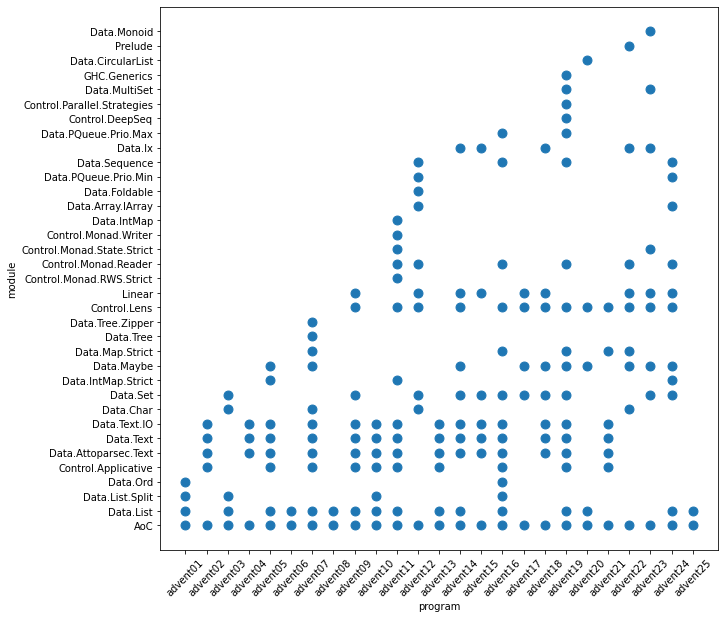

In [47]:
imports_scatter.plot.scatter(x='program', y='module', s=80, rot=45, figsize=(10, 10))

In [48]:
imports_df.columns.size

35

In [49]:
sorted_imports = imports_df.sum().sort_values(ascending=False).index.values
sorted_imports

array(['AoC', 'Data.List', 'Data.Text', 'Data.Attoparsec.Text',
       'Data.Text.IO', 'Control.Lens', 'Data.Set', 'Data.Maybe',
       'Control.Applicative', 'Linear', 'Control.Monad.Reader',
       'Data.Map.Strict', 'Data.Ix', 'Data.Sequence', 'Data.List.Split',
       'Data.Char', 'Data.IntMap.Strict', 'Data.Array.IArray',
       'Control.Monad.State.Strict', 'Data.MultiSet', 'Data.Ord',
       'Data.PQueue.Prio.Max', 'Data.PQueue.Prio.Min', 'Data.Tree',
       'Data.Tree.Zipper', 'GHC.Generics', 'Control.DeepSeq',
       'Data.Monoid', 'Data.IntMap', 'Data.Foldable', 'Data.CircularList',
       'Control.Parallel.Strategies', 'Control.Monad.Writer',
       'Control.Monad.RWS.Strict', 'Prelude'], dtype=object)

In [50]:
imports_sorted_cols = imports_df[sorted_imports]
imports_sorted_cols

AoC  Data.List  Data.Text  Data.Attoparsec.Text  Data.Text.IO  \
advent01  True       True      False                 False         False   
advent02  True      False       True                  True          True   
advent03  True       True      False                 False         False   
advent04  True      False       True                  True          True   
advent05  True       True       True                  True          True   
advent06  True       True      False                 False         False   
advent07  True       True       True                  True          True   
advent08  True       True      False                 False         False   
advent09  True       True       True                  True          True   
advent10  True       True       True                  True          True   
advent11  True       True       True                  True          True   
advent12  True      False      False                 False         False   
advent13  True       True       True                  True          True   
advent14  True       True       True                  True          True   
advent15  True      False       True                  True          True   
advent16  True       True       True                  True          True   
advent17  True      False      False                 False         False   
advent18  True      False       True                  True          True   
advent19  True       True       True                  True          True   
advent20  True       True      False                 False         False   
advent21  True      False       True                  True          True   
advent22  True      False      False                 False         False   
advent23  True      False      False                 False         False   
advent24  True       True      False                 False         False   
advent25  True       True      False                 False         False   

          Control.Lens  Data.Set  Data.Maybe  Control.Applicative  Linear  \
advent01         False     False       False                False   False   
advent02         False     False       False                 True   False   
advent03         False      True       False                False   False   
advent04         False     False       False                False   False   
advent05         False     False        True                 True   False   
advent06         False     False       False                False   False   
advent07         False     False        True                 True   False   
advent08         False     False       False                False   False   
advent09          True      True       False                 True    True   
advent10         False     False       False                 True   False   
advent11          True     False       False                 True   False   
advent12          True      True       False                False    True   
advent13         False     False       False                 True   False   
advent14          True      True        True                False    True   
advent15         False      True       False                False    True   
advent16          True      True       False                 True   False   
advent17          True      True        True                False    True   
advent18          True      True        True                False    True   
advent19          True      True        True                 True   False   
advent20          True     False        True                False   False   
advent21          True     False       False                 True   False   
advent22          True     False        True                False    True   
advent23          True      True        True                False    True   
advent24          True      True        True                False    True   
advent25         False     False       False                False   False   

          ...  GHC.Generics  Co

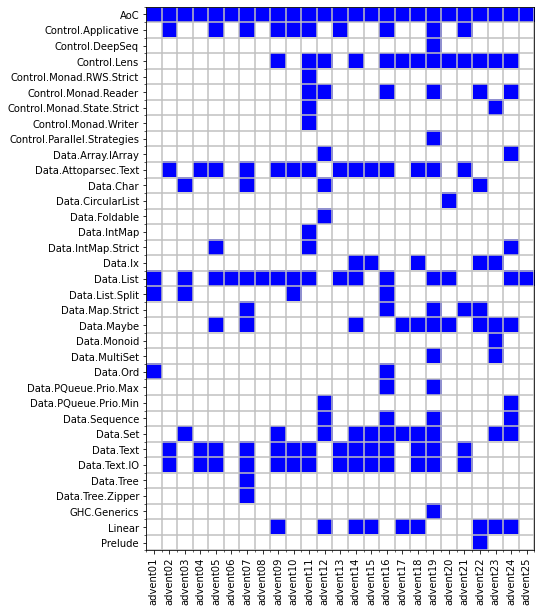

In [51]:
cmap = mpl.colors.ListedColormap(['white', 'blue'])

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(imports_df.to_numpy().T, cmap=cmap)
plt.xticks(range(imports_df.index.size), labels=imports_df.index.values, rotation=90);
plt.yticks(range(imports_df.columns.size), labels=imports_df.columns.values);

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax.grid(which='minor', axis='both', linestyle='-', color='silver', linewidth=1.5);
plt.savefig('imports.png');

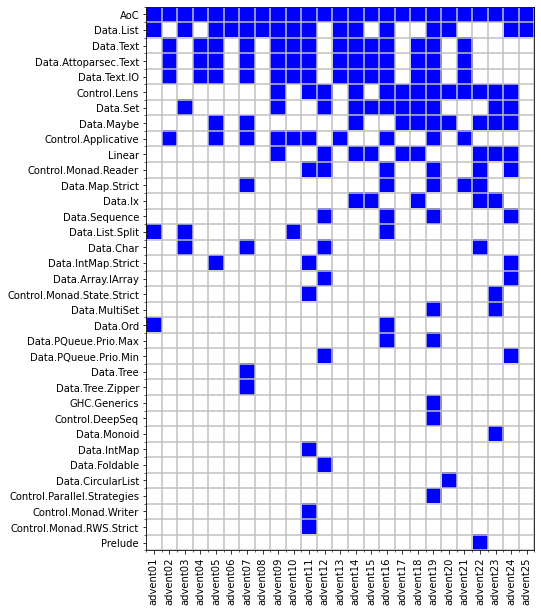

In [52]:
cmap = mpl.colors.ListedColormap(['white', 'blue'])

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(imports_sorted_cols.to_numpy().T, cmap=cmap)
plt.xticks(range(imports_sorted_cols.index.size), labels=imports_sorted_cols.index.values, rotation=90);
plt.yticks(range(imports_sorted_cols.columns.size), labels=imports_sorted_cols.columns.values);

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
ax.grid(which='minor', axis='both', linestyle='-', color='silver', linewidth=1.5);
plt.savefig('imports_sorted.png');

In [82]:
import matplotlib as mpl
mpl.__version__

'3.4.2'